1545_241115EISScan1_V99831_EIS1.2Acm2.csv
2024_11_15_17_10_04
1553_241115EISScan1_V99831_EIS_0.400Acm2.csv
2024_11_15_17_21_44
1564_241115TRScan1_V99831_CP_0.005Acm2.idf
1579_241115EISScan1_V99831_EIS_0.600Acm2.idf
1573_241115EISScan1_V99831_EIS1.2Acm2.idf
1559_241115EISScan1_V99831_EIS_0.050Acm2.csv
2024_11_15_17_30_21
1571_241115EISScan1_V99831_EIS1.6Acm2.csv
2024_11_15_17_47_45
1544_241115TRScan1_V99831_CP 1.2Acm2.idf
1541_241115TRScan1_V99831_filename.idf
1584_241115TRScan1_V99831_CP_0.100Acm2.csv
2024_11_15_18_07_01
1585_241115EISScan1_V99831_EIS_0.100Acm2.idf
1537_241115LSVScan3_V99831.csv
2024_11_15_15_49_39
1574_241115TRScan1_V99831_CP 1Acm2.idf
1573_241115EISScan1_V99831_EIS1.2Acm2.csv
2024_11_15_17_50_34
1579_241115EISScan1_V99831_EIS_0.600Acm2.csv
2024_11_15_17_59_11
1559_241115EISScan1_V99831_EIS_0.050Acm2.idf
1571_241115EISScan1_V99831_EIS1.6Acm2.idf
1545_241115EISScan1_V99831_EIS1.2Acm2.idf
1553_241115EISScan1_V99831_EIS_0.400Acm2.idf
1564_241115TRScan1_V99831_CP_0.005Acm

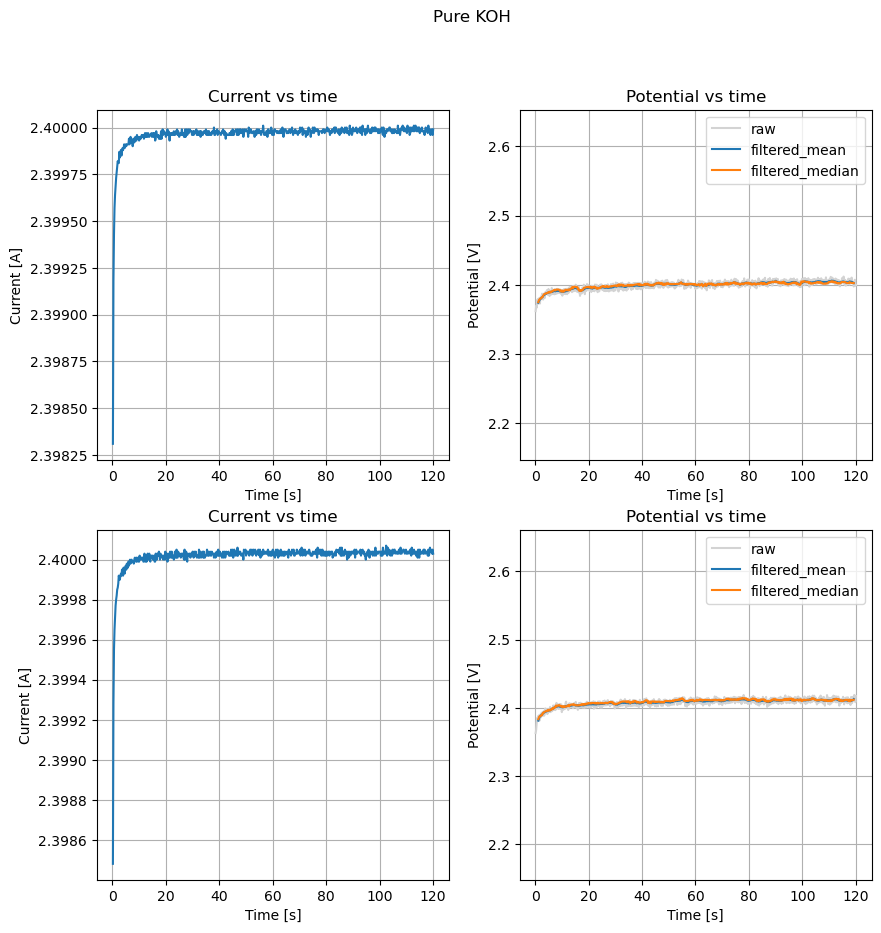

In [5]:
from ProcessingClass import Measurement
import matplotlib.pyplot as plt

A = Measurement((2024, 11,15, 16,0,0), (2024, 11, 15, 18,30,0), 'experiment 2 6.5M KOH 10mM LiOH')
data = A.TRScans[:2]
ws = 10


fig, ax = plt.subplots(ncols = 2, nrows = len(data), figsize = (10, 5*len(data)))
fig.suptitle('Pure KOH')
for i in range(len(data)):
    data[i]['potential_filtered_mean'] = data[i]['potential'].rolling(window=ws, center=True).mean()
    data[i]['potential_filtered_median'] = data[i]['potential'].rolling(window=ws, center=True).median()
    ax[i, 0].set_title('Current vs time')
    ax[i, 0].plot(data[i]['time'], data[i]['current'])
    ax[i, 0].grid()
    ax[i, 0].set_xlabel('Time [s]')
    ax[i, 0].set_ylabel('Current [A]')

    ax[i, 1].set_title('Potential vs time')
    ax[i, 1].plot(data[i]['time'], data[i]['potential'], label = 'raw', color = 'lightgrey')
    ax[i, 1].plot(data[i]['time'], data[i]['potential_filtered_mean'], label = 'filtered_mean')
    ax[i, 1].plot(data[i]['time'], data[i]['potential_filtered_median'], label = 'filtered_median')
    ax[i, 1].grid()
    ax[i, 1].set_xlabel('Time [s]')
    ax[i, 1].set_ylabel('Potential [V]')
    ax[i, 1].legend()
    ax[i, 1].set_ylim(min(data[i]['potential'])/1.1, max(data[i]['potential'])*1.1)

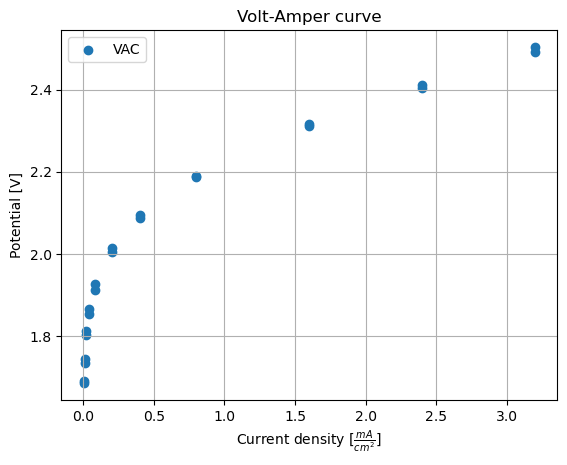

In [6]:
plt.scatter(A.js, A.vs, label = 'VAC')
plt.grid()
plt.title('Volt-Amper curve')
plt.xlabel('Current density [$\\frac{mA}{cm^2}$]')
plt.ylabel('Potential [V]')
plt.legend()

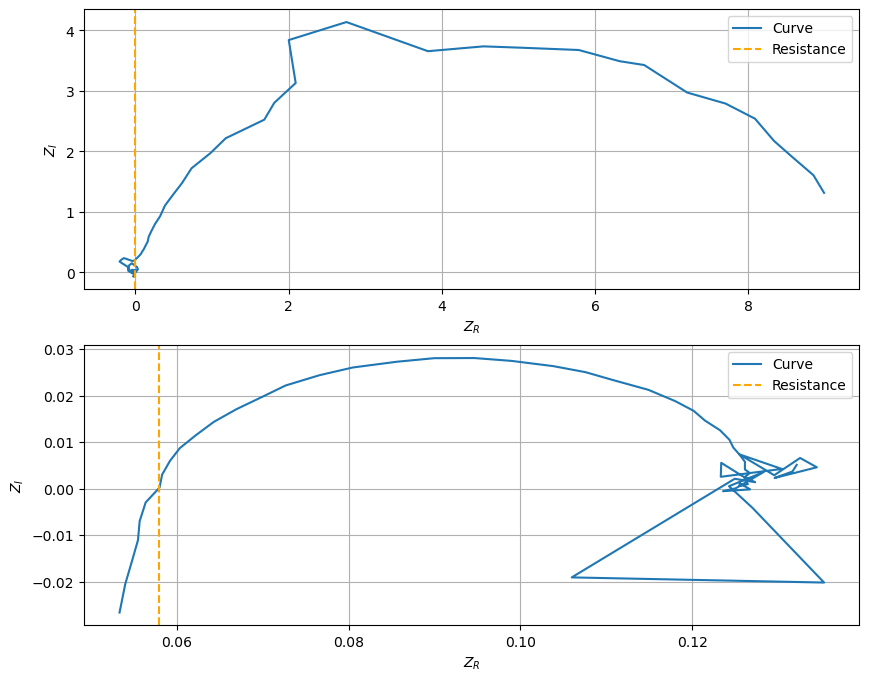

In [7]:
data = A.ZZplots[:2]
#data['potential_filtered'] = medfilt(data['potential'], kernel_size=11)
ws = 10


fig, ax = plt.subplots(nrows = len(data), figsize = (10, 4*len(data)))
for i in range(len(data)):
    ax[i].plot(data[i]['1'], data[i]['2'], label = 'Curve')
    ax[i].grid()
    ax[i].set_xlabel('$Z_R$')
    ax[i].set_ylabel('$Z_I$')
    ax[i].axvline(A.rs[i], linestyle ='--', color = 'orange', label = 'Resistance')
    ax[i].legend(loc = 'upper right')

Text(0, 0.5, 'Resistance [$\\Omega$]')

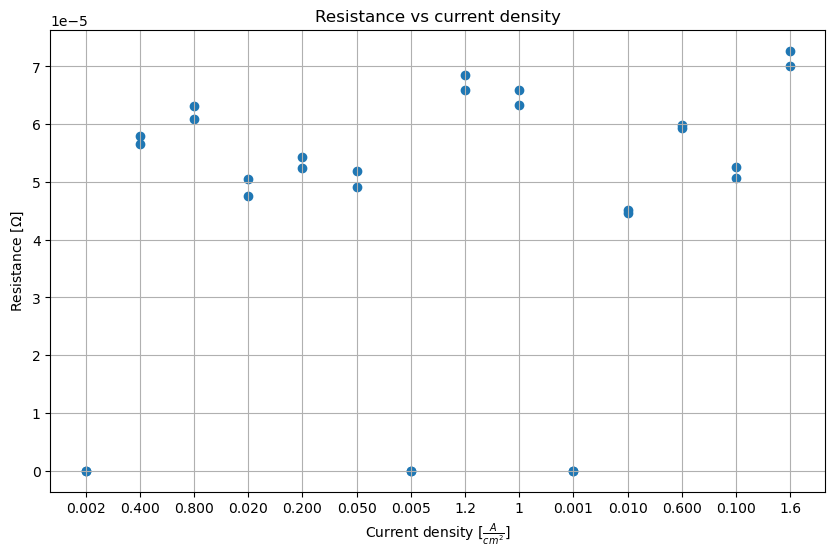

In [8]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(A.currents_ZZ, A.rs/1000)
ax.grid()
ax.set_title('Resistance vs current density')
ax.set_xlabel('Current density [$\\frac{A}{cm^2}$]')
ax.set_ylabel('Resistance [$\\Omega$]')